# <center>LAB03 - Network Data</center>
##  <center>62070505204 Trirat Arromrit</center>

In [3]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

### Read CSV.

In [7]:
dolphin_edge = pd.read_csv('dolphin_edges.csv')
dolphin_edge.head(10)

,From,To
0,CCL,Double
1,DN16,Feather
2,DN21,Feather
3,Beak,Fish
4,Bumper,Fish
5,DN16,Gallatin
6,DN21,Gallatin
7,Feather,Gallatin
8,Beak,Grin
9,CCL,Grin


In [10]:
G_dolphin = nx.from_pandas_edgelist(dolphin_edge,source = 'From' ,target = 'To',create_using=nx.MultiDiGraph)

In [11]:
G_dolphin

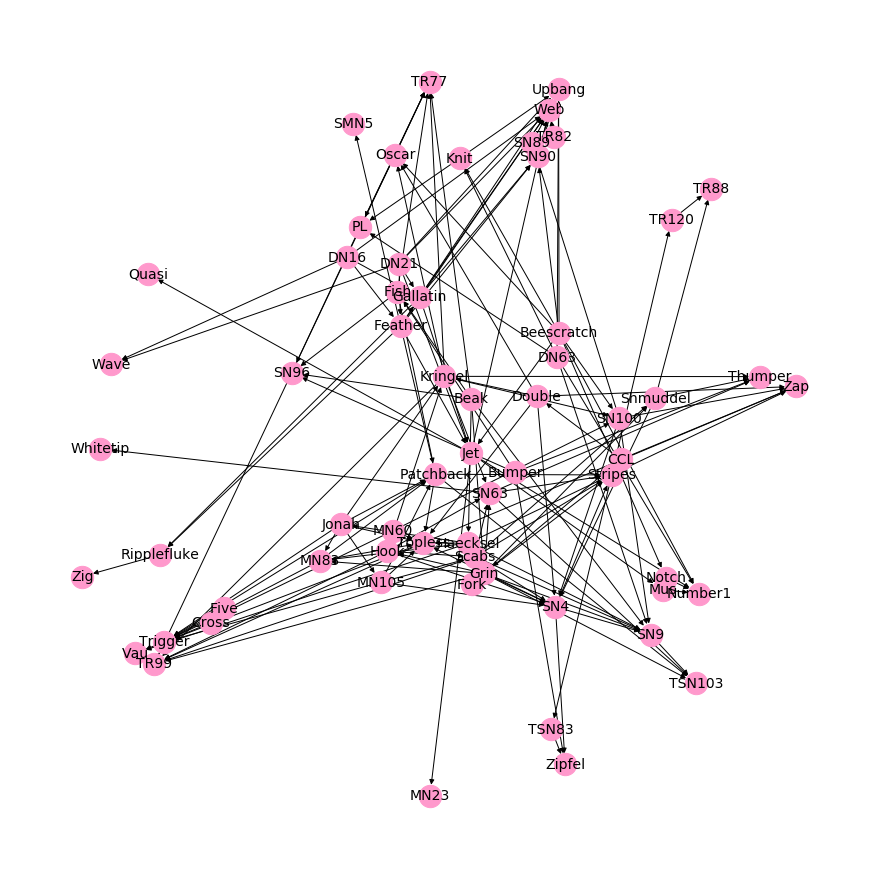

In [12]:
plt.figure(3,figsize=(12,12)) 
nx.draw(G_dolphin,with_labels=True, node_size=500, font_size=14, node_color='#FF99CC')
plt.show()

In [13]:
print(nx.info(G_dolphin))

Name: 
Type: MultiDiGraph
Number of nodes: 62
Number of edges: 159
Average in degree:   2.5645
Average out degree:   2.5645


In [15]:
pd.DataFrame(G_dolphin.degree, columns=['Node','Degree']) #This is overall indegree

,Node,Degree
0,CCL,3
1,Double,6
2,DN16,4
3,Feather,7
4,DN21,6
...,...,...
57,TR82,1
58,Whitetip,1
59,Zap,5
60,Zig,1


# 1. Who are the most popular?

In [18]:
dolphin_in = pd.DataFrame(G_dolphin.in_degree, columns=['Node','Degree'])
dolphin_in

,Node,Degree
0,CCL,0
1,Double,1
2,DN16,0
3,Feather,2
4,DN21,0
...,...,...
57,TR82,0
58,Whitetip,1
59,Zap,5
60,Zig,1


In [20]:
dolphin_in.sort_values(by='Degree', ascending=False).head(10)

,Node,Degree
49,Trigger,9
56,Web,9
43,Topless,8
35,SN4,7
38,SN9,7
45,TR77,6
47,TR99,6
53,Upbang,6
59,Zap,5
41,Stripes,5


In [ ]:
dolphin_edge

# 2. Pick 2 individuals, find the shortest path between them

In [24]:
dolphin_weight = dolphin_edge
dolphin_weight["weight"] = 1
dolphin_weight

,From,To,weight
0,CCL,Double,1
1,DN16,Feather,1
2,DN21,Feather,1
3,Beak,Fish,1
4,Bumper,Fish,1
...,...,...,...
154,Topless,Zap,1
155,Ripplefluke,Zig,1
156,Bumper,Zipfel,1
157,SN4,Zipfel,1


In [27]:
G_dolphin2 = nx.from_pandas_edgelist(dolphin_weight,source = 'From' ,target = 'To',create_using=nx.MultiDiGraph)

In [39]:
print([p for p in nx.all_shortest_paths(G_dolphin2, source = 'Stripes', target = 'TSN83', weight='weight')])

[['Stripes', 'TSN83']]


In [43]:
print("The shortest path of Stripes to TSN83 :",nx.shortest_path_length(G_dolphin2, source='Stripes', target='TSN83'))

The shortest path of Stripes to TSN83 : 1


# 3.What does the shortest path mean?

Answer : ในความคิดเห็นของผม shortest path มันช่วยแสดงความสัมพันธ์ของผู้ใช้ network ตัวนี้ โดยตัวที่เป็น shortest path คือผู้ใช้ที่มีความสัมพันธ์หรือสื่อสารกันโดยตรง

# 4. Find how many components are there in the network

In [54]:
G_dolphin = nx.from_pandas_edgelist(dolphin_edge,source = 'From' ,target = 'To',create_using=nx.Graph)

In [50]:
Component_G = [x for x in nx.connected_components(G_dolphin)]

In [59]:
len(Component_G)

1

In [58]:
print('Number of component :',nx.number_connected_components(G_dolphin))

Number of component : 1
